In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
tickers = ["CPRX", "UTHR", "INCY", "QGEN", "EVO", "TMO", "REGN", "VRTX", "SAN", "VEEV", "LONN"]


In [6]:
data = []
for i in tickers: 
    ticker= yf.Ticker(i)
    df = ticker.history('10Y')
    df = df.reset_index()
    tc = [i]*len(df) 
    # my_list = ["hello"] * 10
    df["Ticker"] = tc
    data.append(df)

In [7]:
data

[                          Date   Open   High    Low  Close   Volume  \
 0    2014-02-24 00:00:00-05:00   2.30   2.32   2.21   2.24  1240300   
 1    2014-02-25 00:00:00-05:00   2.22   2.27   2.12   2.24  1029700   
 2    2014-02-26 00:00:00-05:00   2.25   2.36   2.24   2.29  1026600   
 3    2014-02-27 00:00:00-05:00   2.30   2.34   2.25   2.33   722500   
 4    2014-02-28 00:00:00-05:00   2.33   2.39   2.18   2.24  1081000   
 ...                        ...    ...    ...    ...    ...      ...   
 2513 2024-02-16 00:00:00-05:00  13.86  14.09  13.71  14.00  1136600   
 2514 2024-02-20 00:00:00-05:00  14.00  14.35  13.66  13.79  1325200   
 2515 2024-02-21 00:00:00-05:00  13.77  13.90  13.57  13.71   739600   
 2516 2024-02-22 00:00:00-05:00  13.70  14.02  13.49  13.90  1171400   
 2517 2024-02-23 00:00:00-05:00  13.91  14.15  13.70  14.04   683500   
 
       Dividends  Stock Splits Ticker  
 0           0.0           0.0   CPRX  
 1           0.0           0.0   CPRX  
 2           0

In [8]:
data = pd.concat(data, axis = 0, ignore_index = True)

In [9]:
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
0,2014-02-24 00:00:00-05:00,2.30,2.32,2.21,2.24,1240300,0.0,0.0,CPRX
1,2014-02-25 00:00:00-05:00,2.22,2.27,2.12,2.24,1029700,0.0,0.0,CPRX
2,2014-02-26 00:00:00-05:00,2.25,2.36,2.24,2.29,1026600,0.0,0.0,CPRX
3,2014-02-27 00:00:00-05:00,2.30,2.34,2.25,2.33,722500,0.0,0.0,CPRX
4,2014-02-28 00:00:00-05:00,2.33,2.39,2.18,2.24,1081000,0.0,0.0,CPRX
...,...,...,...,...,...,...,...,...,...
22657,2024-02-16 00:00:00-05:00,3.94,3.95,3.91,3.92,1443600,0.0,0.0,SAN
22658,2024-02-20 00:00:00-05:00,4.05,4.09,4.04,4.08,3289100,0.0,0.0,SAN
22659,2024-02-21 00:00:00-05:00,4.09,4.11,4.07,4.09,2869500,0.0,0.0,SAN
22660,2024-02-22 00:00:00-05:00,4.13,4.15,4.07,4.09,7003500,0.0,0.0,SAN


CPRX 2518


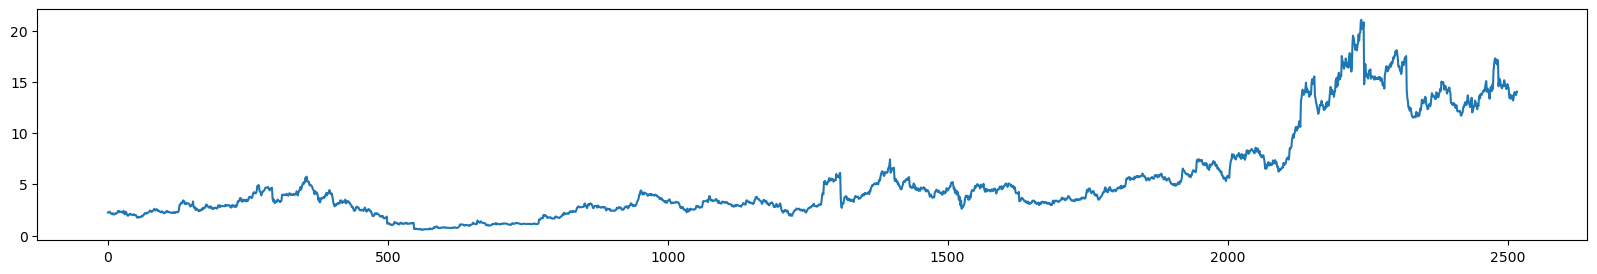

EVO 2518


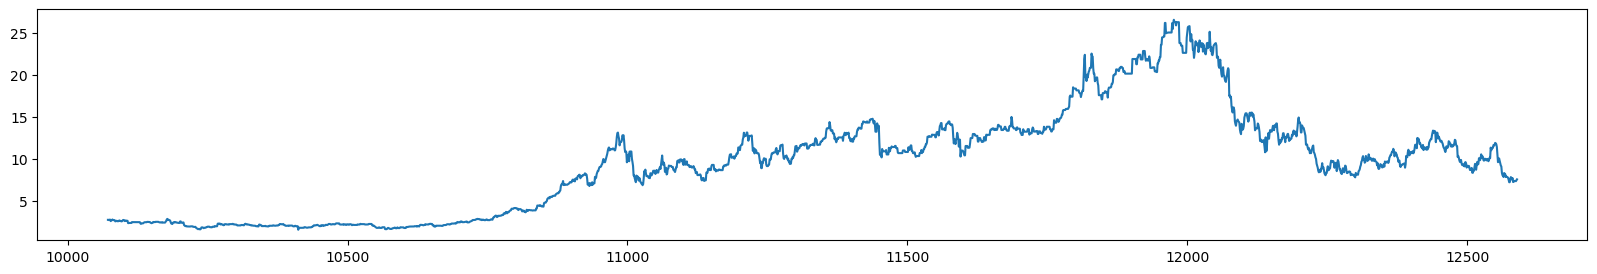

INCY 2518


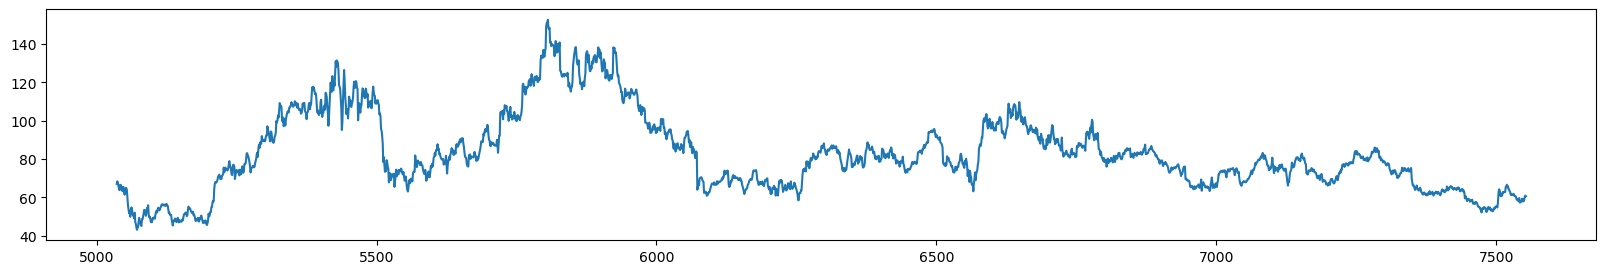

QGEN 2518


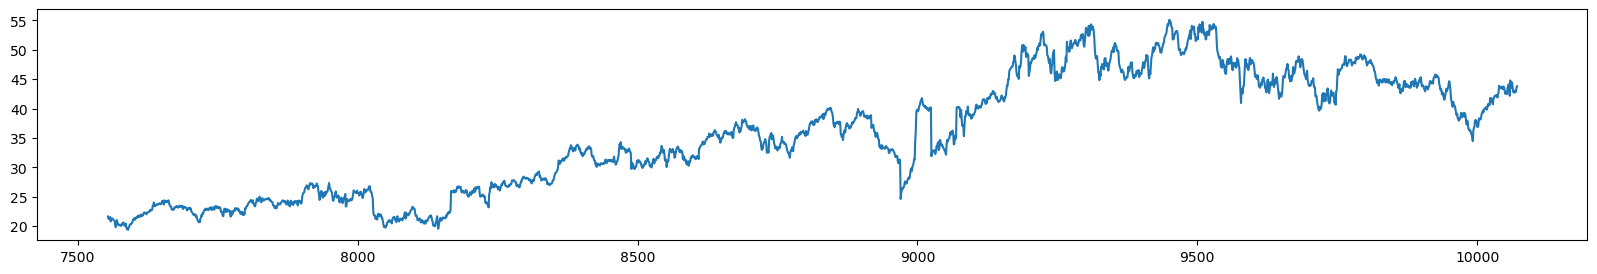

REGN 2518


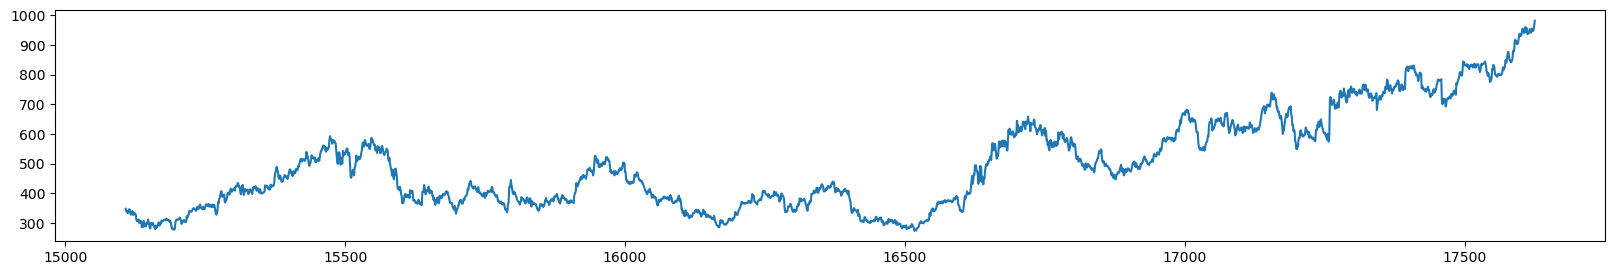

SAN 2518


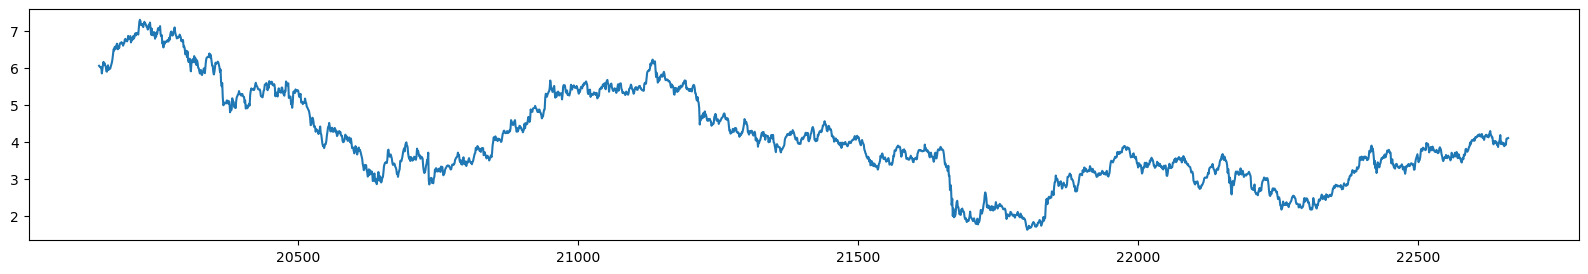

TMO 2518


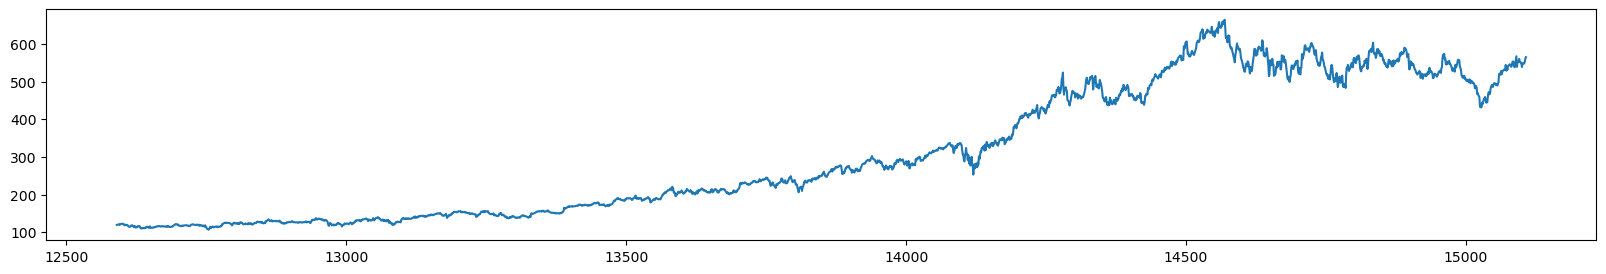

UTHR 2518


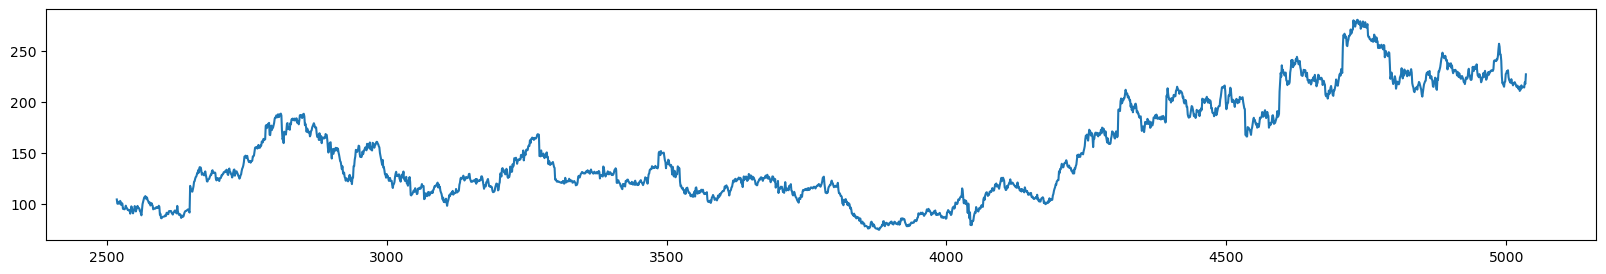

VRTX 2518


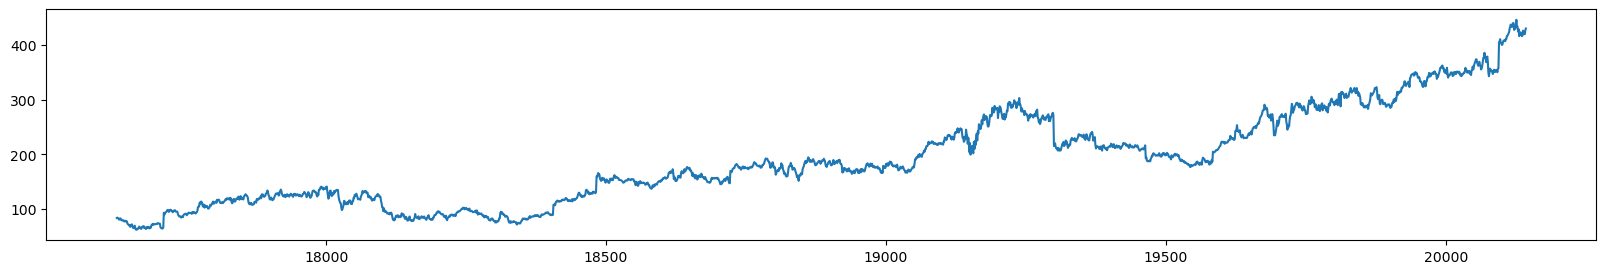

In [10]:
gbt = data.groupby("Ticker")
for i, k in gbt: 
    print(i, len(k))
    plt.figure(figsize = (20, 3))
    plt.plot(k["Close"])
    plt.show()

CPRX 2518


<Figure size 2000x600 with 0 Axes>

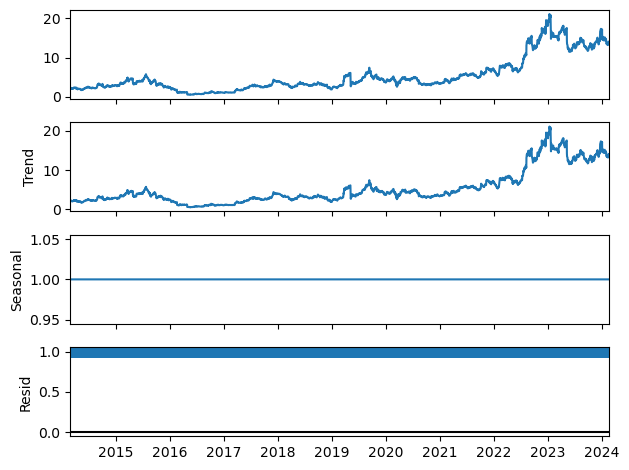

EVO 2518


<Figure size 2000x600 with 0 Axes>

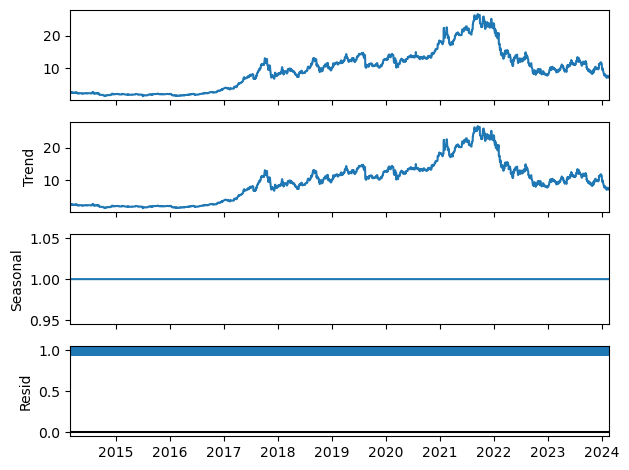

INCY 2518


<Figure size 2000x600 with 0 Axes>

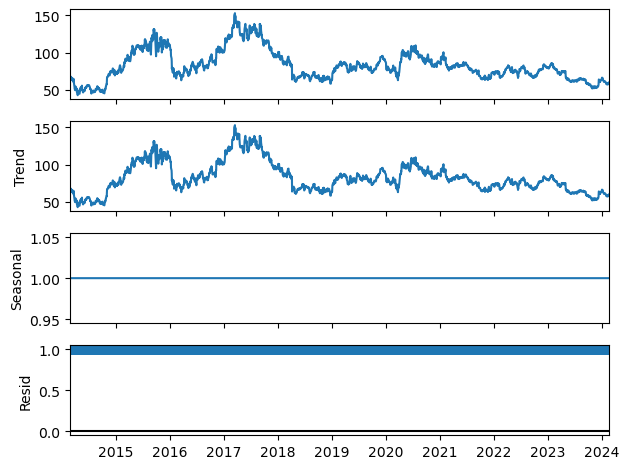

QGEN 2518


<Figure size 2000x600 with 0 Axes>

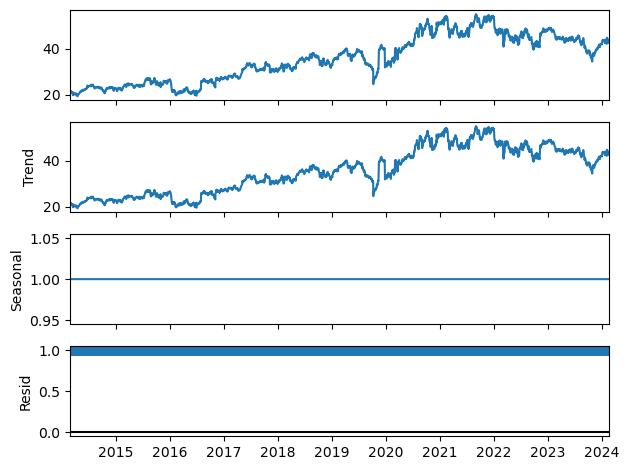

REGN 2518


<Figure size 2000x600 with 0 Axes>

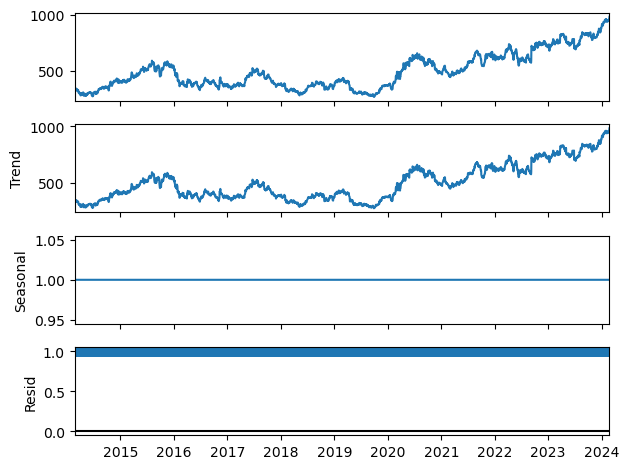

SAN 2518


<Figure size 2000x600 with 0 Axes>

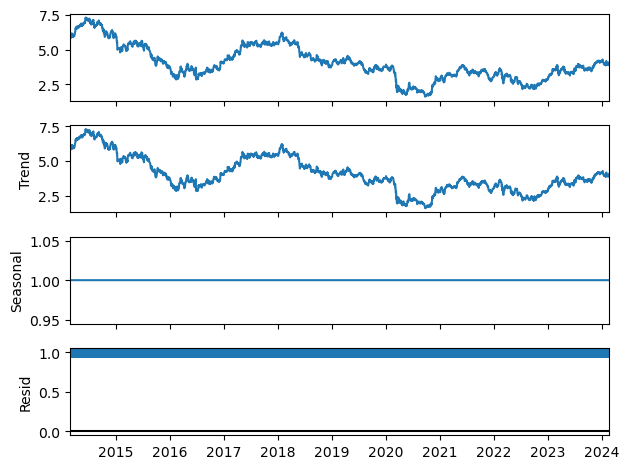

TMO 2518


<Figure size 2000x600 with 0 Axes>

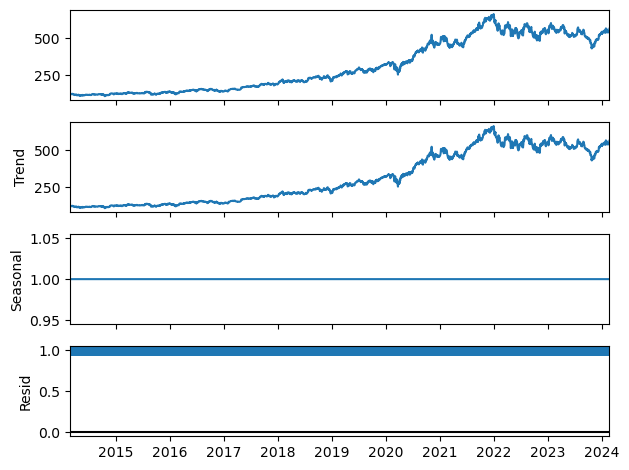

UTHR 2518


<Figure size 2000x600 with 0 Axes>

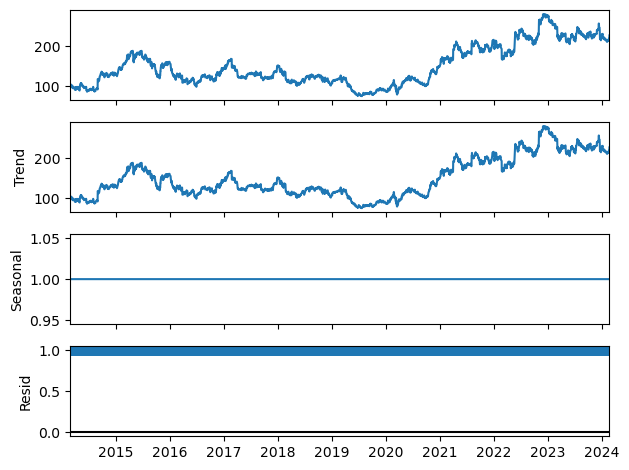

VRTX 2518


<Figure size 2000x600 with 0 Axes>

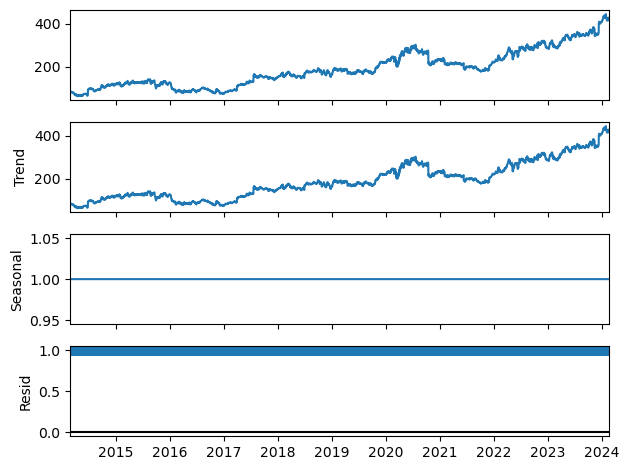

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
gbt = data.groupby("Ticker")
for i, k in gbt: 
    print(i, len(k))
    data_i = k[['Date','Close']].set_index('Date')
    
    result = seasonal_decompose(data_i, model='multiplicative', period=1)
    plt.figure(figsize = (20, 6))
    result.plot()
    plt.show()